# I- Importing data from Kaggle

In [1]:
! pip install kaggle

In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"idrissbenhmida","key":"b9921c14a1988686bae49ff6c0bd992a"}'}

In [3]:
# importing data set from kaggle using API

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d datamunge/sign-language-mnist
!unzip sign-language-mnist.zip

 91% 57.0M/62.6M [00:00<00:00, 85.2MB/s]
100% 62.6M/62.6M [00:00<00:00, 106MB/s] 
Archive:  sign-language-mnist.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_test.csv     
  inflating: sign_mnist_test/sign_mnist_test.csv  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


# II- Data Understanfing

In [4]:
# Importing Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [56]:
# Reading csv files

train_images = pd.read_csv('./sign_mnist_train.csv')
test_images = pd.read_csv('./sign_mnist_test.csv')

In [57]:
# Extraction of pixels from csv files

X_train = train_images.drop(["label"],axis=1).values
X_test = test_images.drop(["label"],axis=1).values

# Extraction of labels from csv files

Y_train = train_images['label'].values
Y_test = test_images['label'].values

In [58]:
# Displaying data shapes

a=X_train.shape
b=X_test.shape
c=Y_train.shape
d=Y_test.shape

print('shape of X_train :',a)
print('shape of X_test :',b)
print('shape of Y_train :',c)
print('shape of Y_test :',d)

shape of X_train : (27455, 784)
shape of X_test : (7172, 784)
shape of Y_train : (27455,)
shape of Y_test : (7172,)


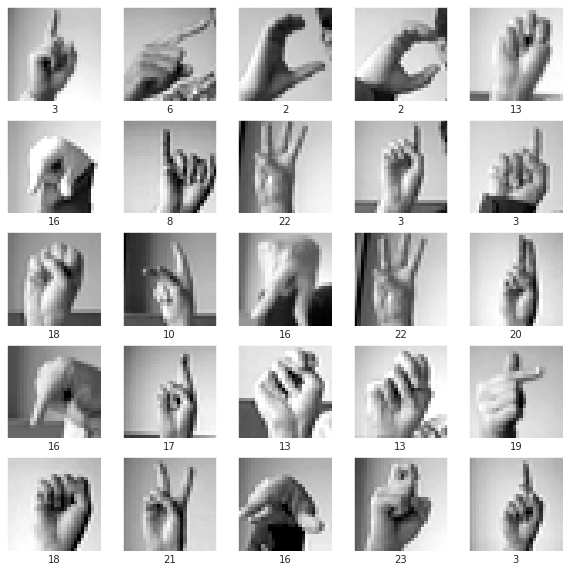

In [59]:
# Data Visualisation
# Visualize some pictures

X_train = X_train.reshape(-1,28,28)
X_test = X_test.reshape(-1,28,28)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
    plt.xlabel(Y_train[i])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


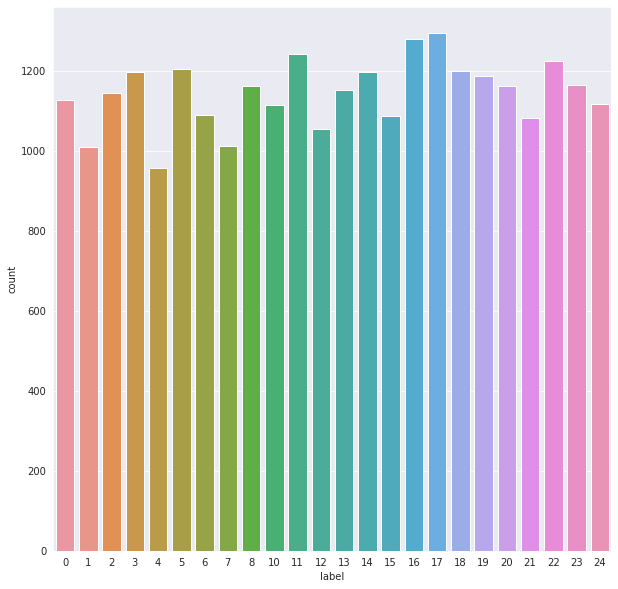

In [60]:
# Displaying CountPlot

plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(train_images['label'])

# III- Data Preparation:

In [61]:
# Reshaping data

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [62]:
# Data normalization (values between 0 and 1)

X_train = X_train/255.0
X_test = X_test/255.0

In [63]:
# View the shape

X_train.shape

(27455, 28, 28, 1)

In [64]:
# One hot encoding of the labels

label_binrizer = LabelBinarizer()
Y_train = label_binrizer.fit_transform(Y_train)
Y_test = label_binrizer.fit_transform(Y_test)

### Data Augmentation:

In [65]:
# We did data augmentation because we don't have sufficient data

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

In [66]:
# Fitting the data augmentation model

datagen.fit(X_train)

# IV- Modeling:

In [67]:
# Defining the ReduceLROnPlateau which automatically decreases the learning rate after 2 epochs without increasing the accuracy

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)

In [68]:
# Defining the CNN model for image classification

model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))

model.add(Flatten())

model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))

In [69]:
# Compiling the model

model.compile(optimizer= 'adam' ,loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 75)        750       
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 75)        300       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 75)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 50)        33800     
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 50)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 14, 14, 50)        200       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 50)         

In [70]:
# Fitting the model

history = model.fit(datagen.flow(X_train, Y_train, batch_size = 128) ,epochs = 20 , validation_data = (X_test, Y_test) , callbacks = [learning_rate_reduction])

Epoch 1/20
215/215 [==============================] - 100s 463ms/step - loss: 1.7935 - accuracy: 0.4686 - val_loss: 3.5355 - val_accuracy: 0.1025
Epoch 2/20
215/215 [==============================] - 100s 466ms/step - loss: 0.2697 - accuracy: 0.9129 - val_loss: 1.3844 - val_accuracy: 0.5265
Epoch 3/20
215/215 [==============================] - 100s 465ms/step - loss: 0.1178 - accuracy: 0.9628 - val_loss: 0.0615 - val_accuracy: 0.9877
Epoch 4/20
215/215 [==============================] - 100s 465ms/step - loss: 0.0743 - accuracy: 0.9769 - val_loss: 0.0927 - val_accuracy: 0.9741
Epoch 5/20
215/215 [==============================] - 100s 466ms/step - loss: 0.0584 - accuracy: 0.9811 - val_loss: 0.0517 - val_accuracy: 0.9801

Epoch 00005: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 6/20
215/215 [==============================] - 101s 467ms/step - loss: 0.0321 - accuracy: 0.9912 - val_loss: 0.0123 - val_accuracy: 0.9976
Epoch 7/20
215/215 [=======================

# V- Evaluation:

In [71]:
# Evaluation of the model on test data

model.evaluate(X_test, Y_test, verbose=0)

[0.0013524178648367524, 0.999721109867096]

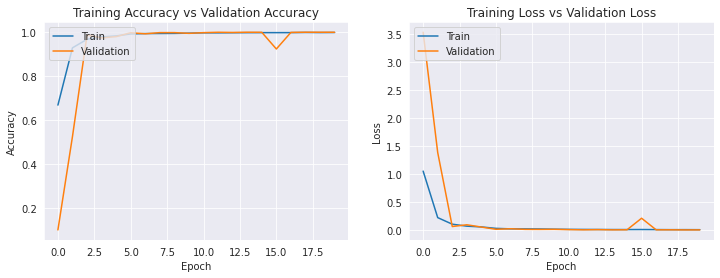

In [72]:
# Plotting the training plots

fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [74]:
# Saving the model

model.save('model_projet_ia.h5')